# Análise entre número de faltas e média final do aluno

# Import's

In [0]:
#Lib para manuseio dos dados
import pandas as pd
#Lib para plotar os graficos
import matplotlib.pyplot as plt

# Links dos dados abertos

In [0]:
anos = []
#Matriculas nos componentes
anos = {2013.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/517ed5f6-f8a2-40fd-826b-6ed3388f6e88/download/matricula-componente-20132.csv',
        2014.1: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/7081446d-39f9-4374-ad0b-86ecab97e569/download/matricula-componente-20141.csv',
        2014.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/e974792c-b557-470c-bf3d-ede7d5b5e6a6/download/matricula-componente-20142.csv',
        2015.1: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/9e7ba1c2-f92d-4b9c-9e91-3b026ecdf913/download/matriculas-de-2015.1.csv',
        2015.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/baa6c8b4-2072-417f-b238-c028ccc8c14b/download/matriculas-de-2015.2.csv',
        2016.1: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv',
        2016.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv',
        2017.1: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171.csv',
        2017.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172.csv'}

# Definindo períodos para análise

In [4]:
#Definindo o período de avaliação e filtro de situação dos alunos
ano_ini = 2013
sem_ini = 2
ano_fim = 2017
sem_fim = 2

ano_min = (float) (ano_ini + (sem_ini/10))
ano_max = (float) (ano_fim + (sem_fim/10))
anos_analise = []
for i in range(ano_ini, ano_fim+1):
    for j in range(1, 3):
        valor = (float) (i + (j/10))
        if valor >= ano_min and valor <= ano_max:
            anos_analise.append(valor)
print("Períodos a serem avaliados: ", anos_analise)
possiveis = ["APROVADO POR NOTA", "REPROVADO", "APROVADO"]

Períodos a serem avaliados:  [2013.2, 2014.1, 2014.2, 2015.1, 2015.2, 2016.1, 2016.2, 2017.1, 2017.2]


# Executar loop pelos períodos

In [5]:
grafico = {}
#Executando o algoritmo em todos os anos a serem analisados
for i in anos_analise:
  #Reinicializa variaveis
  matricula = ""
  matr_data = []
  media = []
  qtde = []
  soma = []
  final = []

  print("*****************Semestre " + str(i) + "********************")
  matricula = anos[i]
  print("Importando turmas " + str(i) + "...")
  matricula_data = pd.read_csv(matricula, sep=";").loc[:, ["id_turma", "discente", "media_final", "numero_total_faltas", "descricao"]]
  matricula_data['periodo'] = i
  print("Total de registros em turmas: ", len(matricula_data.index))
  
  #Filtrando dados validos e removendo duplicidades
  print("Filtrando...")
  matr_data = matricula_data[matricula_data.descricao.isin(possiveis)]
  matr_data.shape
  matr_data = matr_data.drop_duplicates()
  matr_data = matr_data.dropna()
  print("Total de registros em matrículas (filtrado): ", len(matr_data.index))
  
  #Calculando 
  print("Calculando ...")
  turmas = matr_data.loc[:, ['periodo', 'media_final', 'numero_total_faltas']]
  
  #Salvando para gerar gráficos
  print("Salvando...")
  grafico[i] = pd.DataFrame({'periodo': [str(i)],
                             'media'  : [turmas['media_final'].mean()],
                             'faltas' : [turmas['numero_total_faltas'].mean()]})
  

*****************Semestre 2013.2********************
Importando turmas 2013.2...
Total de registros em turmas:  667167
Filtrando...
Total de registros em matrículas (filtrado):  153846
Calculando ...
Salvando...
*****************Semestre 2014.1********************
Importando turmas 2014.1...
Total de registros em turmas:  698421
Filtrando...
Total de registros em matrículas (filtrado):  158968
Calculando ...
Salvando...
*****************Semestre 2014.2********************
Importando turmas 2014.2...
Total de registros em turmas:  818762
Filtrando...
Total de registros em matrículas (filtrado):  151569
Calculando ...
Salvando...
*****************Semestre 2015.1********************
Importando turmas 2015.1...
Total de registros em turmas:  876468
Filtrando...
Total de registros em matrículas (filtrado):  158693
Calculando ...
Salvando...
*****************Semestre 2015.2********************
Importando turmas 2015.2...
Total de registros em turmas:  658092
Filtrando...
Total de registros e

# Gerar gráfico dos períodos

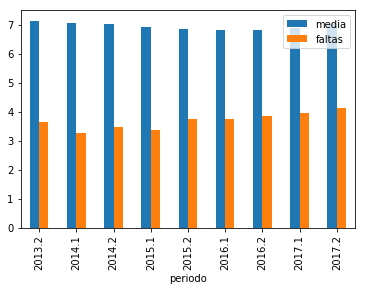

In [6]:
graficos = pd.concat(grafico, ignore_index=True)
graficos.set_index('periodo')
graficos.plot(kind='bar', x='periodo')